first trying hough with cv.HoughCircles in OpenCV


it uses Hough Gradient Method which uses the gradient information of edges instead of using 3D accumlator and voting in it

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# plt.imshow(gimg , cmap="gray")
def load_image(name):
    grey_img = cv2.imread(name,0)
    togrey_img = cv2.imread(name)
    color_img = cv2.cvtColor(grey_img,cv2.COLOR_GRAY2BGR )
    gimg = cv2.cvtColor(togrey_img,cv2.COLOR_BGR2GRAY )
    return gimg , color_img
    

first we will smooth the image to avoid detecting false circles using Gaussian filter

In [5]:
def blur_image(img , ksize):
    blurred_image = cv2.GaussianBlur(img, (ksize,ksize), cv2.BORDER_DEFAULT)
    return blurred_image 

In [6]:
def detect_edge(img):
    edge_detected = cv2.Laplacian(img,cv2.CV_64F)
    return edge_detected

the first step of hough gradient used in cv2.HoughCircles is to find the center of the circle according to the modulus vector of each point, so that the three-dimensional accumulation plane is transformed into a two-dimensional accumulation plane; the second step is to support it based on the edge non-zero pixels of all candidate centers Degree to determine the radius.

In [7]:

#circles arrays is (centerx , centery , radius)
def circle_func(image , min_dist , p1 , p2 ):
    circles = cv2.HoughCircles(image,cv2.HOUGH_GRADIENT,1.1,min_dist,
                            param1=p1,param2=p2,minRadius=0,maxRadius=0)
    circles = np.uint16(np.around(circles))
    return circles
# HOUGH_GRADIENT : is the only method for detection 
# dp :   inverse ratio between accumlator reolution to image resolution when dp = 1 accumlator resolution = image resolution
#when dp =2 accumlator resolution = 0.5 image resolution , 0.5 width and height
# min dist : minimum distance between centres of circles
# parameter 1 : higher threshold of the two passed to the canny edge detector 
# parameter 2 : accumlator threshold for the circles centres of detection stage
  

In [8]:
def plot_circles(circled , circles):
    for (x,y,r) in circles[0,:]:
        cv2.circle(circled,(x,y),r,(255,0,0),2)
        cv2.circle(circled,(x,y),2,(0,255,255),3)
        plt.imshow(circled)

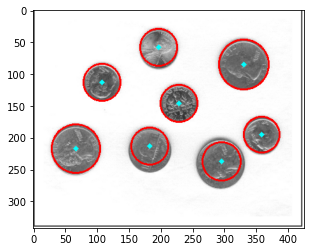

In [9]:
grey_img , color_img = load_image("Circles.png")
blur_img = blur_image(grey_img , 3)
circles = circle_func(blur_img , 20 , 50 ,70)
plot_circles(color_img , circles)
#parameters for circles are 20 50 70

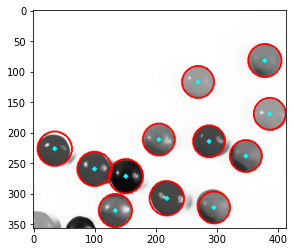

In [10]:
grey_img , color_img = load_image("smarties.png")
blur_img = blur_image(grey_img , 3)
circles = circle_func(blur_img , 20 , 50 ,60)
plot_circles(color_img , circles)

implementation from scratch 